# 初探神經網路

### 因為在深度學習的應用，常常會有Python和套件版本相依性的問題存在，因此我們這邊提出確認版本的方法，未來電腦程式執行有問題時可以依此確認過!

In [1]:
import tensorflow
print(tensorflow.__version__)

2.18.0


In [2]:
import tensorflow.keras as ks
ks.__version__

'3.8.0'

In [3]:
!python --version

Python 3.11.12


## 載入資料、準備資料

In [5]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
print(train_images.ndim)#ndim 為 3, 有 3 個軸

3


In [7]:
print(train_images.shape)#shape 為 60000x28x28 維的 3D 張量 (有 3 個元素)

(60000, 28, 28)


In [9]:
print(train_images.dtype)#元素的資料型別為 0~255 的整數

uint8


### 顯示第 4 個數字的圖像

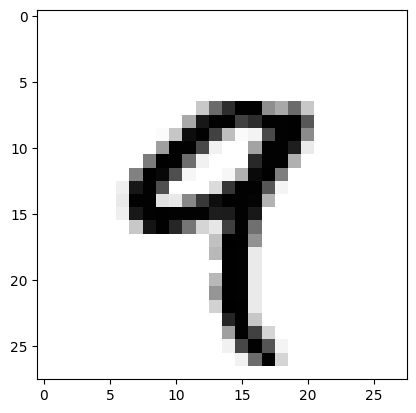

In [10]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

----
## 試試看基本的類神經網路

In [11]:
# 舊版是這樣
#from keras import models
#from keras import layers
#from keras.datasets import mnist
#from keras.utils import to_categorical


In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [13]:
#- 1>準備資料
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#- 整理資料
train_images = train_images.reshape((60000, 28 * 28))  #reshape 是 NumPy 陣列的 method
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

#- 準備標籤
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



In [14]:
print(train_images[0].shape)

(784,)


In [15]:
print(train_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [18]:

#- 2>定義模型
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [19]:
# 觀看模型
network.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#- 3>訓練模型
network.fit(train_images, train_labels, epochs=5, batch_size=128)



Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8696 - loss: 0.4452
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9659 - loss: 0.1179
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9786 - loss: 0.0727
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9855 - loss: 0.0515
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9894 - loss: 0.0363


In [ ]:
#- 4>測試模型
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)